In [8]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [9]:
# 定义函数转化变量类型。
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# 读取mnist数据。
mnist = input_data.read_data_sets("MNIST_data",dtype=tf.uint8, one_hot=True)
images = mnist.train.images
labels = mnist.train.labels
pixels = images.shape[1]
num_examples = mnist.train.num_examples

# 输出TFRecord文件的地址。
filename = "output.tfrecords"
writer = tf.python_io.TFRecordWriter(filename)
for index in range(num_examples):
    image_raw = images[index].tostring()

    example = tf.train.Example(features=tf.train.Features(feature={
        'pixels': _int64_feature(pixels),
        'label': _int64_feature(np.argmax(labels[index])),
        'image_raw': _bytes_feature(image_raw)
    }))
    writer.write(example.SerializeToString())
writer.close()
print "TFRecord文件已保存。"


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
TFRecord文件已保存。


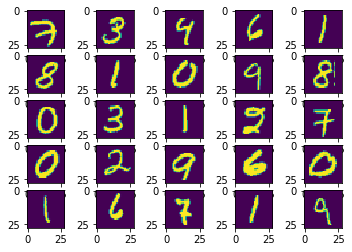

In [14]:
# 读取文件。
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(["output.tfrecords"])
_,serialized_example = reader.read(filename_queue)

# 解析读取的样例。
features = tf.parse_single_example(
    serialized_example,
    features={
        'image_raw':tf.FixedLenFeature([],tf.string),
        'pixels':tf.FixedLenFeature([],tf.int64),
        'label':tf.FixedLenFeature([],tf.int64)
    })

images = tf.decode_raw(features['image_raw'],tf.uint8)
labels = tf.cast(features['label'],tf.int32)
pixels = tf.cast(features['pixels'],tf.int32)

sess = tf.Session()

# 启动多线程处理输入数据。
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess,coord=coord)

x_size = 5
y_size = 5
gs1 = gridspec.GridSpec(x_size, y_size)
for x in range(x_size):
    for y in range(y_size):
        image, label, pixel = sess.run([images, labels, pixels])
        plt.subplot(gs1[x, y]); plt.imshow(image.reshape([28,28]))
plt.show()